# Phase 4 Time Series Project

## Group Members
- William Itotia
- Firdosa Mohammed
- Frank Oyugi
- Esther Terry Munene

# HOUSING YOU TOO LTD TOP 5 BEST ZIP CODES

## Problem Statement

Housing You Too Ltd, a consultancy and real estate firm, has been approached by a client eager to invest in properties with the goal of achieving the highest possible Return on Investment (ROI). The client is looking for our expert guidance to identify the top 5 zip codes that promise the best ROI. Recognizing the complexity and layered nature of this question, we are committed to providing a thorough and data-driven analysis. To achieve this, we will utilize the extensive Zillow dataset, which contains historical real estate data. By analyzing trends, property values, and other key metrics, we aim to deliver the most accurate and insightful recommendations to guide our client's investment decisions for maximum profitability.

## Objectives

1. Identify the 5 best zip codes that will bring our clients the highest ROI.

2. Build a time series regression model in order to predict the 5 most profitable zip codes.

3. Using the dataset and the model created investigate the growth rate of the real estate industry in relation to sales value of properties.

4. Identify the 5 worst zip codes that our client should avoid in order to prevent incurring losses.

## Challenges

1. Data Ambiguity and Unpredictability: Since we are using real-world data, there is a possibility of ambiguity and unpredictability, which can lead to some inaccuracies in our analysis and predictions.

2. Changing Market Conditions: Real estate markets are influenced by various external factors such as economic shifts, policy changes, and unforeseen events like natural disasters or pandemics. These factors can alter market conditions rapidly, making historical data less reliable for future predictions.

## Solutions

1. We will implement robust data cleaning and preprocessing techniques to handle missing values, outliers, and inconsistencies. We will also use advanced statistical methods and machine learning algorithms that can manage noisy data and enhance prediction accuracy.

2. Integrate real-time data sources and economic indicators into the analysis to account for current market conditions. Use adaptive models that can update predictions based on the latest data. 


### Importing Necessary Libraries

In [207]:
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import time 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


import warnings
warnings.filterwarnings('ignore')



# DATA UNDERSTANDING

Before we begin any serious analysis or modelling on our data, we first need to understand what our dataset says or tells us. This is where data understanding comes in.

In [208]:
# loading data

df = pd.read_csv('zillow_data.csv')

In [209]:
#Inspect first five rows of dataset

df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


Our dataset has 272 columns and this is what each of the columns mean:

RegionID: Unique index, 58196 through 753844

RegionName: Unique Zip Code, 1001 through 99901

City: City in which the zip code is located

State: State in which the zip code is located

Metro: Metropolitan Area in which the zip code is located

CountyName: County in which the zip code is located

SizeRank: Numerical rank of size of zip code, ranked 1 through 14723

1996-04 through 2018-04: refers to the median housing sales values for April 1996 through April 2018, that is 265 data points of monthly data for each zip code

In [210]:
df.shape

(14723, 272)

We can see from above that we have a good sized dataset with 14,723 rows and 272 columns 

In [211]:
# Summary statistics of our dataset

df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,...,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04
mean,81075.010052,48222.348706,7362.000000,1.182991e+05,1.184190e+05,1.185374e+05,1.186531e+05,1.187803e+05,1.189275e+05,1.191205e+05,...,2.733354e+05,2.748658e+05,2.764646e+05,2.780332e+05,2.795209e+05,2.810953e+05,2.826571e+05,2.843687e+05,2.865114e+05,2.880399e+05
std,31934.118525,29359.325439,4250.308342,8.600251e+04,8.615567e+04,8.630923e+04,8.646795e+04,8.665094e+04,8.687208e+04,8.715185e+04,...,3.603984e+05,3.614678e+05,3.627563e+05,3.644610e+05,3.656003e+05,3.670454e+05,3.695727e+05,3.717739e+05,3.724612e+05,3.720544e+05
min,58196.000000,1001.000000,1.000000,1.130000e+04,1.150000e+04,1.160000e+04,1.180000e+04,1.180000e+04,1.200000e+04,1.210000e+04,...,1.440000e+04,1.450000e+04,1.470000e+04,1.480000e+04,1.450000e+04,1.430000e+04,1.410000e+04,1.390000e+04,1.380000e+04,1.380000e+04
25%,67174.500000,22101.500000,3681.500000,6.880000e+04,6.890000e+04,6.910000e+04,6.920000e+04,6.937500e+04,6.950000e+04,6.960000e+04,...,1.269000e+05,1.275000e+05,1.282000e+05,1.287000e+05,1.292500e+05,1.299000e+05,1.306000e+05,1.310500e+05,1.319500e+05,1.324000e+05
50%,78007.000000,46106.000000,7362.000000,9.950000e+04,9.950000e+04,9.970000e+04,9.970000e+04,9.980000e+04,9.990000e+04,9.995000e+04,...,1.884000e+05,1.896000e+05,1.905000e+05,1.914000e+05,1.925000e+05,1.934000e+05,1.941000e+05,1.950000e+05,1.967000e+05,1.981000e+05
75%,90920.500000,75205.500000,11042.500000,1.432000e+05,1.433000e+05,1.432250e+05,1.432250e+05,1.435000e+05,1.437000e+05,1.439000e+05,...,3.050000e+05,3.066500e+05,3.085000e+05,3.098000e+05,3.117000e+05,3.134000e+05,3.151000e+05,3.168500e+05,3.188500e+05,3.211000e+05
max,753844.000000,99901.000000,14723.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


Data Distribution

mean: The average property prices (or other metrics) have increased significantly from 1996 to 2018.

std: There is a high standard deviation, indicating substantial variability in the data.

min and max: The minimum and maximum values show a wide range, indicating significant differences in property values across regions and time.

# Data Preparation

Now that we have a greater understanding of our data we need to prepare it for modelling. This includes cleaning the data and Exploratory Data Analysis (EDA)

In [212]:
# Checking for duplicates and missing data in the dataset
def cleaning(data):
    "This is a simple function to get missing and duplicated values"
    missing = data.isna().sum().sum()
    duplicated = data.duplicated().sum()
    return (f"There are '{missing}' missing values and '{duplicated}' duplicated values in the dataset")

In [213]:
# Calling the function
cleaning(df)

"There are '157934' missing values and '0' duplicated values in the dataset"

We seem to have quite a few columns with missing data, Below is how we will handle the missing data

In [214]:
# creating a dataframe to display the column datatypes and unique values
desc = []
for i in df.columns:
    desc.append([
        i,
        df[i].dtypes,
        df[i].nunique(),
    ])

pd.DataFrame(data = desc, columns=['Feature','Dtypes','Sample_Unique'])

,Feature,Dtypes,Sample_Unique
0,RegionID,int64,14723
1,RegionName,int64,14723
2,City,object,7554
3,State,object,51
4,Metro,object,701
...,...,...,...
267,2017-12,int64,5248
268,2018-01,int64,5276
269,2018-02,int64,5303
270,2018-03,int64,5332


In [215]:
# Defined a function to  calculate the percentage of missing values in the dataset
def missing_values_percentage(df):
    # Calculating the total number of missing values in the Dataframe
    total_missing = df.isnull().sum().sum()

    # checking the total number of cells in the DataFrame
    total_cells = df.size

    # calculating the percentage of missing values
    percentage_missing = (total_missing / total_cells) * 100
    
    return percentage_missing

missing_values_percentage(df)

3.943759463983923

- Missing values are 3.94% of the entire dataset. Lets go ahead and preview the percentage of missing values per each individual column

In [216]:
# Calculating the percentage of missing values for each column in the DataFrame
missing_values = df.isnull().mean() * 100

# Print the list of columns in the DataFrame along with their missing percentages
for column in missing_values.index:
    # Print the column name followed by its corresponding missing percentage
    print(column, missing_values[column])


RegionID 0.0
RegionName 0.0
City 0.0
State 0.0
Metro 7.084154044691979
CountyName 0.0
SizeRank 0.0
1996-04 7.056985668681655
1996-05 7.056985668681655
1996-06 7.056985668681655
1996-07 7.056985668681655
1996-08 7.056985668681655
1996-09 7.056985668681655
1996-10 7.056985668681655
1996-11 7.056985668681655
1996-12 7.056985668681655
1997-01 7.056985668681655
1997-02 7.056985668681655
1997-03 7.056985668681655
1997-04 7.056985668681655
1997-05 7.056985668681655
1997-06 7.056985668681655
1997-07 7.050193574679074
1997-08 7.050193574679074
1997-09 7.050193574679074
1997-10 7.050193574679074
1997-11 7.050193574679074
1997-12 7.050193574679074
1998-01 7.036609386673912
1998-02 7.036609386673912
1998-03 7.036609386673912
1998-04 7.036609386673912
1998-05 7.036609386673912
1998-06 7.036609386673912
1998-07 7.036609386673912
1998-08 7.036609386673912
1998-09 7.036609386673912
1998-10 7.036609386673912
1998-11 7.036609386673912
1998-12 7.036609386673912
1999-01 7.036609386673912
1999-02 7.0366093

- The percentage of the missing values per column is still low, it is ranging from 1%-7% thus we chose to fill the missing values for the metro column with the string  missing then dropping the missing values in the date columns.

In [217]:
# Filling the 'Metro' column with the word 'missing'
df['Metro'].fillna('missing', inplace=True)

# Calculating the percentage of missing values for each column in the DataFrame
missing_values = df.isnull().mean() * 100

# Handling the date columns' missing values
df.dropna(inplace=True)

# Print the list of columns in the DataFrame along with their missing percentages
for column, percentage in missing_values.items():
    print(f"{column}: {percentage}%")

RegionID: 0.0%
RegionName: 0.0%
City: 0.0%
State: 0.0%
Metro: 0.0%
CountyName: 0.0%
SizeRank: 0.0%
1996-04: 7.056985668681655%
1996-05: 7.056985668681655%
1996-06: 7.056985668681655%
1996-07: 7.056985668681655%
1996-08: 7.056985668681655%
1996-09: 7.056985668681655%
1996-10: 7.056985668681655%
1996-11: 7.056985668681655%
1996-12: 7.056985668681655%
1997-01: 7.056985668681655%
1997-02: 7.056985668681655%
1997-03: 7.056985668681655%
1997-04: 7.056985668681655%
1997-05: 7.056985668681655%
1997-06: 7.056985668681655%
1997-07: 7.050193574679074%
1997-08: 7.050193574679074%
1997-09: 7.050193574679074%
1997-10: 7.050193574679074%
1997-11: 7.050193574679074%
1997-12: 7.050193574679074%
1998-01: 7.036609386673912%
1998-02: 7.036609386673912%
1998-03: 7.036609386673912%
1998-04: 7.036609386673912%
1998-05: 7.036609386673912%
1998-06: 7.036609386673912%
1998-07: 7.036609386673912%
1998-08: 7.036609386673912%
1998-09: 7.036609386673912%
1998-10: 7.036609386673912%
1998-11: 7.036609386673912%
1998-

- There are '0' missing values and '0' duplicated values in the dataset.The dataset doesn't have any missing values or any duplicates. Since region ID is the unique identifier, let's check if there is any duplicates in that column.

In [218]:
# Checking for duplicates in the region ID column only
df[df['RegionID'].duplicated(keep=False)]


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04


- The data does not have any duplicated ID in the region ID column values

In [219]:
# Define a function to check and print the value counts for each column in a DataFrame
def check_value_counts(data):
    # Iterate through each column in the DataFrame
    for column in data.columns:
        # Print a message indicating the column name
        print(f'Value counts for {column}:')
        
        # Used the value_counts() function to count unique values in the column and print the result
        print(data[column].value_counts())
        
        # Print a separator line for clarity
        print('------------------------------------------','\n')

# Calling the function
check_value_counts(df)


Value counts for RegionID:
73724    1
72582    1
76672    1
97146    1
91001    1
        ..
62023    1
58806    1
97717    1
60701    1
98304    1
Name: RegionID, Length: 13684, dtype: int64
------------------------------------------ 

Value counts for RegionName:
55324    1
99109    1
47906    1
11040    1
44273    1
        ..
98057    1
89521    1
75182    1
1450     1
65536    1
Name: RegionName, Length: 13684, dtype: int64
------------------------------------------ 

Value counts for City:
New York         104
Los Angeles       93
Houston           86
San Antonio       48
Washington        43
                ... 
Kenneth City       1
Prairieville       1
Sherburne          1
East Moriches      1
Hague              1
Name: City, Length: 7046, dtype: int64
------------------------------------------ 

Value counts for State:
CA    1188
NY     985
TX     944
PA     797
FL     765
OH     529
IL     523
NJ     502
MI     453
MA     414
NC     402
TN     399
IN     392
VA     372
MN    

- The dataset  does not have any data inconsistencies

In [220]:
# checking the DataFrame 
print(df)

       RegionID  RegionName                 City State              Metro  \
0         84654       60657              Chicago    IL            Chicago   
1         90668       75070             McKinney    TX  Dallas-Fort Worth   
2         91982       77494                 Katy    TX            Houston   
3         84616       60614              Chicago    IL            Chicago   
4         93144       79936              El Paso    TX            El Paso   
...         ...         ...                  ...   ...                ...   
14718     58333        1338             Ashfield    MA    Greenfield Town   
14719     59107        3293            Woodstock    NH          Claremont   
14720     75672       40404                Berea    KY           Richmond   
14721     93733       81225  Mount Crested Butte    CO            missing   
14722     95851       89155             Mesquite    NV          Las Vegas   

      CountyName  SizeRank   1996-04   1996-05   1996-06  ...  2017-07  \
0

There is still some more data preparation to be done that will now be completed.

In [221]:
# Rename the 'RegionName' column to 'ZipCode' in the DataFrame 'df'
df.rename(columns={'RegionName':'ZipCode'}, inplace=True)

In [222]:
# Converted Zipcode column values to string
df.ZipCode = df.ZipCode.astype('string')

In [223]:
# Print the minimum value in the 'ZipCode' column of the DataFrame 'df'
print(df.ZipCode.min())

1001


In [224]:
# Filled  the 'ZipCode' column in the DataFrame 'df' with leading zeros to make it a 5-digit string
df['ZipCode'] = df['ZipCode'].str.zfill(5)

- In order to address the issues identified in the business understanding phase, two new columns will be generated ; one for calculating the return on investment (ROI) and another for determining the coefficient of variation. The coefficient of variation measures the extent of data point dispersion around the mean and indicates the ratio of standard deviation to the mean. This enables investors to evaluate the level of risk involved relative to the ROI.

### Feature Engineering

In [225]:
# Calculating and creating a new column - ROI
df['ROI'] = (df['2017-04'] / df['1996-04']) - 1

# Calculating standard deviation (std) to be used for CV
df["std"] = df.loc[:, "1996-04":"2017-04"].std(skipna=True, axis=1)

# Calculating mean to be used for CV
df["mean"] = df.loc[:, "1996-04":"2017-04"].mean(skipna=True, axis=1)

# Calculating and creating a new column - CV
df["CV"] = df['std'] / df["mean"]

# Dropping std and mean columns as they are not necessary for analysis
df.drop(["std", "mean"], inplace=True, axis=1)

In [226]:
# Displaying the updated dataframe
df

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,CV
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,1.959904,0.254011
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,312500,314100,315000,316600,318100,319600,321100,321800,0.291472,0.125692
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320200,320400,320800,321200,321200,323000,326900,329900,0.520913,0.139660
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,1.574784,0.235153
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,120000,120300,120300,120300,120300,120500,121000,121500,0.526520,0.179646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,01338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,218600,218500,218100,216400,213100,209800,209200,209300,1.235729,0.231776
14719,59107,03293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,212200,215200,214300,213100,213700,218300,222700,225800,1.096009,0.306994
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,124600,126700,128800,130600,131700,132500,133000,133400,1.115587,0.176079
14721,93733,81225,Mount Crested Butte,CO,missing,Gunnison,14722,191100.0,192400.0,193700.0,...,682400,695600,695500,694700,706400,705300,681500,664400,2.100471,0.279729


In [227]:
# Define upper limit of CV according to risk profile for 'best5'.
upper_cv = df['CV'].quantile(0.4)
print(f'\nCV upper limit: {upper_cv}')
# Get the 5 regionname with highest ROIs within the firm's risk profile for 'best5'.
RN_best5 = df[df['CV'] < upper_cv].sort_values('ROI', ascending=False).head(5)
print('\nBest 5 RegionName:')
print(RN_best5[['ZipCode', 'ROI', 'CV']])


CV upper limit: 0.19462196086514255

Best 5 RegionName:
      ZipCode       ROI        CV
13753   48894  2.519912  0.188706
14437   80105  2.117647  0.185238
13910   67228  2.091977  0.179971
12939   28125  1.954610  0.189419
8653    29541  1.934211  0.191900


In [228]:
RN_best5['location'] = RN_best5['City'] + ", " + RN_best5['State']

In [229]:
best_5_RN_with_location = RN_best5[['ZipCode','location']]
print(best_5_RN_with_location)

      ZipCode        location
13753   48894  Westphalia, MI
14437   80105  Deer Trail, CO
13910   67228     Wichita, KS
12939   28125  Mount Ulla, NC
8653    29541    Florence, SC


# EXPLORATORY DATA ANALYSIS

Now what's left to do is to visually analyze our data. This will help us gain an even deeper understanding of our data before modelling.

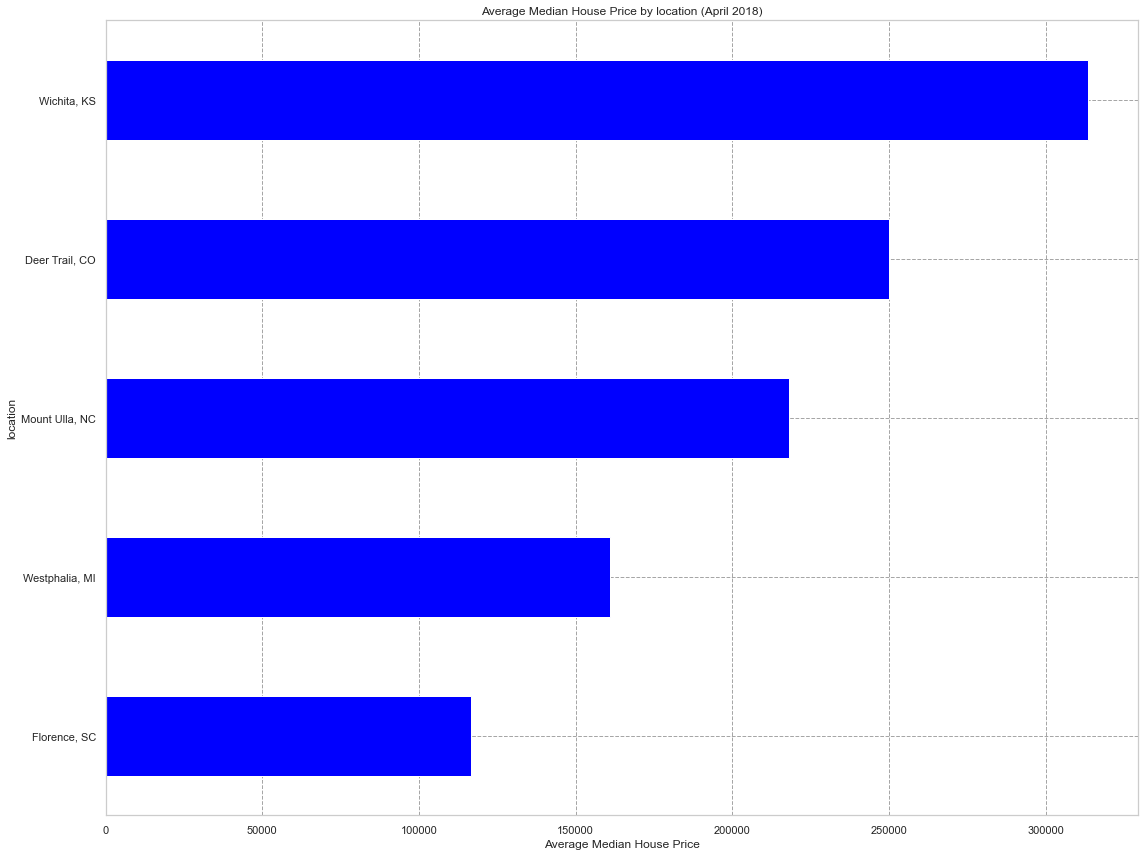

In [230]:
# Calculating the average median house price for each state in April 2018
locationprice = RN_best5.groupby('location')['2018-04'].mean().sort_values()

# Plotting the average median house price by state for April 2018
plt.figure(figsize=(16, 12))
locationprice.plot(kind='barh', color='blue')
plt.title('Average Median House Price by location (April 2018)')
plt.xlabel('Average Median House Price')
plt.ylabel('location')
plt.grid(True, which="both", ls="--", c='0.65')
plt.tight_layout()
plt.show()

In [231]:
# Created a new copy of the dataset
melted_df = df.copy()

- The initial dataset comprises 272 columns representing different datetime columns, which can complicate data analysis and visualization tasks. To streamline this, we’ll transform the dataframe into a more manageable format where all datetime columns  are consolidated into a single column and their corresponding values in another. This process, known as “melting” the dataframe, enhances the ease of data manipulation and interpretation.

In [232]:
# Defined a function to melt and process the DataFrame

def melt_data(df):
    # Melt the DataFrame 'df' into a long format
    melted = pd.melt(df, id_vars=['ZipCode', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName', 'ROI', 'CV'], var_name='time')
    
    # Converted the 'time' column to datetime format
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    
    # Dropped rows with missing values in the 'value' column
    melted = melted.dropna(subset=['value'])
    
    return melted

# Call the 'melt_data' function to process the DataFrame 'melted_df'
melted_df = melt_data(melted_df)




In [233]:
# Displaying the DataFrame
melted_df


,ZipCode,RegionID,SizeRank,City,State,Metro,CountyName,ROI,CV,time,value
0,60657,84654,1,Chicago,IL,Chicago,Cook,1.959904,0.254011,1996-04-01,334200.0
1,75070,90668,2,McKinney,TX,Dallas-Fort Worth,Collin,0.291472,0.125692,1996-04-01,235700.0
2,77494,91982,3,Katy,TX,Houston,Harris,0.520913,0.139660,1996-04-01,210400.0
3,60614,84616,4,Chicago,IL,Chicago,Cook,1.574784,0.235153,1996-04-01,498100.0
4,79936,93144,5,El Paso,TX,El Paso,El Paso,0.526520,0.179646,1996-04-01,77300.0
...,...,...,...,...,...,...,...,...,...,...,...
3626255,01338,58333,14719,Ashfield,MA,Greenfield Town,Franklin,1.235729,0.231776,2018-04-01,209300.0
3626256,03293,59107,14720,Woodstock,NH,Claremont,Grafton,1.096009,0.306994,2018-04-01,225800.0
3626257,40404,75672,14721,Berea,KY,Richmond,Madison,1.115587,0.176079,2018-04-01,133400.0
3626258,81225,93733,14722,Mount Crested Butte,CO,missing,Gunnison,2.100471,0.279729,2018-04-01,664400.0


In [234]:
melted_df['time'] = pd.to_datetime(melted_df['time'])

- The new dataset has 3626260 rows and 11 columns.The data is from 4th April 1996 to 4th April 2018.The house with the lowest price has a price of 11300 dollars and the one with the highest price has a price of 8558700 dollars. The highest ROI on a house is 11.2% and the lowest ROI on a house is -53.3%.

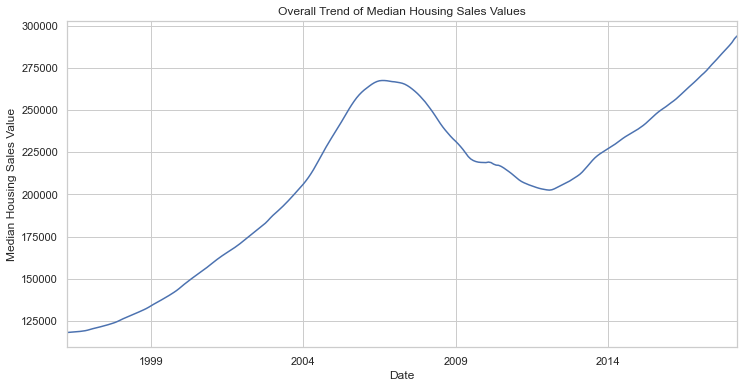

In [235]:
# Visual of overall trends

plt.figure(figsize=(12, 6))
melted_df.groupby('time')['value'].mean().plot()
plt.title('Overall Trend of Median Housing Sales Values')
plt.xlabel('Date')
plt.ylabel('Median Housing Sales Value')
plt.show()


As we can see the trend is an increasing linear trend, where we can see the median housing sales value increases every year.

In [236]:
#Check for seasonal patterns by plotting data for each year.

['Year'] = df_date['Date'].dt.year
['Month'] = df_date['Date'].dt.month

plt.figure(figsize=(12, 6))
df_date.groupby(['Year', 'Month'])['Median_Housing_Sales_Value'].mean().unstack().plot()
plt.title('Seasonality in Median Housing Sales Values')
plt.xlabel('Month')
plt.ylabel('Median Housing Sales Value')
plt.legend(title='Year')
plt.show()


SyntaxError: cannot assign to literal (<ipython-input-236-7042e364e26c>, line 3)

The graph above shows that there is a stable, steadily increasing trend across all the years.

Consistency Across Years: The lines seem to follow a similar upward trend, indicating that the values increase consistently over time within each year.

Overlayed Trends: The lines are very close to each other, suggesting that there might not be significant variation in the trend between different years. This could imply a strong consistent pattern without much seasonal fluctuation.

Seasonal Variation: The lack of visible peaks and troughs in each year suggests that there may be little to no seasonality in the data. Typically, if seasonality were present, you would see periodic rises and falls that repeat each year.


In [ ]:
regions = df_date['RegionName'].unique()

plt.figure(figsize=(12, 6))
for region in regions[:5]:  # Limiting to first 5 regions for simplicity
    df_region = df_date[df_date['RegionName'] == region]
    plt.plot(df_region['Date'], df_region['Median_Housing_Sales_Value'], label=region)

plt.title('Trends of Median Housing Sales Values by Region')
plt.xlabel('Date')
plt.ylabel('Median Housing Sales Value')
plt.legend()
plt.show()


NameError: name 'df_date' is not defined

The graph above shows the following:

General Trend: All datasets exhibit an increasing trend over time or sequential steps.

Comparative Analysis: The group identified as 1002 shows the fastest increase, while the other groups (1001, 1005, 1007, and 1008) show slower and similar rates of increase.

Potential Insights: The varying slopes could indicate differences in growth rates, performance, or other time-dependent changes across the different groups or datasets.

Next we need to find and plot the worst and best performing zips according to our data 

In [ ]:
# Calculate the average median sales value for each zip code
avg_sales_value_by_zip =melt_data.groupby('ZipCode')['value'].mean().reset_index()
avg_sales_value_by_zip.rename(columns={'': 'value'}, inplace=True)

# Sort the zip codes based on average median sales value
best_performing_zips = avg_sales_value_by_zip.sort_values(by='Avg_Median_Sales_Value', ascending=False).head(5)
worst_performing_zips = avg_sales_value_by_zip.sort_values(by='Avg_Median_Sales_Value').head(5)


In [ ]:

# Set the visualisation style
sns.set(style="whitegrid")

# Plot the top 5 best performing zip codes
plt.figure(figsize=(14, 7))
sns.barplot(x='Avg_Median_Sales_Value', y='RegionName', data=best_performing_zips, palette='viridis')
plt.title('Top 10 Best Performing Zip Codes by Average Median Sales Value')
plt.xlabel('Average Median Sales Value')
plt.ylabel('Zip Code')
plt.show()

# Plot the top 5 worst performing zip codes
plt.figure(figsize=(14, 7))
sns.barplot(x='Avg_Median_Sales_Value', y='RegionName', data=worst_performing_zips, palette='viridis')
plt.title('Top 10 Worst Performing Zip Codes by Average Median Sales Value')
plt.xlabel('Average Median Sales Value')
plt.ylabel('Zip Code')
plt.show()


NameError: name 'best_performing_zips' is not defined

<Figure size 1008x504 with 0 Axes>

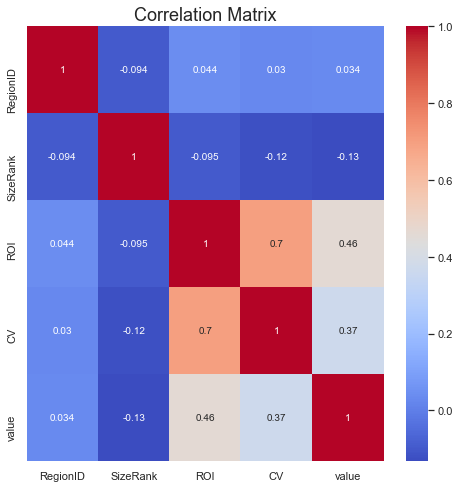

In [237]:
# Calculating the correlation matrix for the 'melted_df' DataFrame
corr_matrix = melted_df.corr()

# Created a figure and axis for the heatmap plot
fig, ax = plt.subplots(figsize=(8, 8))

# Generated a heatmap of the correlation matrix with annotations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)

# Set the title for the heatmap plot
plt.title('Correlation Matrix', fontsize=18)

# Displayed the heatmap plot
plt.show()


- From the heat map above, we  observe that most of the features exhibit weak relationships with each other, except for ROI and CV, which display a strong relationship.

## Time Series Analysis

In [238]:
# Selected columns 'value' and 'time' from the 'melted_df' DataFrame
ts = melted_df[['value', 'time']]

ts.index = pd.date_range(start='2000-01-01', periods=len(ts), freq='T')  # Assuming minute frequency


# Converted the 'time' column to a datetime data type
ts['time'] = pd.to_datetime(ts['time'])

# Set the 'time' column as the index of the 'ts' DataFrame
ts.set_index('time', inplace=True)
ts

,value
time,
1996-04-01,334200.0
1996-04-01,235700.0
1996-04-01,210400.0
1996-04-01,498100.0
1996-04-01,77300.0
...,...
2018-04-01,209300.0
2018-04-01,225800.0
2018-04-01,133400.0


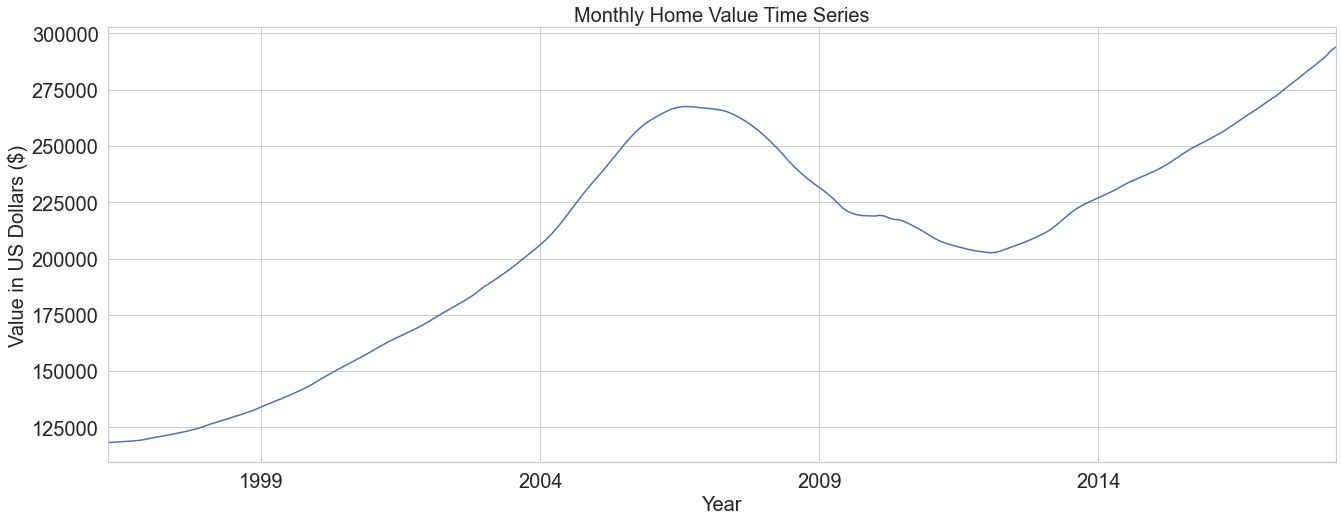

In [239]:
# Defined a function to plot monthly time series data
def plot_monthly_time_series(data, col):
    # Resampled the data to get the monthly mean and select the specified column
    time_series_monthly_value = data.resample('MS').mean()[col]
    
    # Created a line plot for the monthly time series data
    time_series_monthly_value.plot(figsize=(22, 8))
    
    # Set the plot title
    plt.title('Monthly Home Value Time Series', fontsize=20)
    
    # Set the y-axis label
    plt.ylabel('Value in US Dollars ($)', fontsize=20)
    
    # Set the x-axis label
    plt.xlabel('Year', fontsize=20)
    
    # Set font sizes for y-axis and x-axis tick labels
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    
    # Displayed the plot
    plt.show()

# Calling the function 
plot_monthly_time_series(ts, 'value')


- The plot of the housing prices indicates an overall upward trend from 1996 to around 2007, followed by a downward trend until approximately 2013, and then an upward trend again.

- The year 2007 marked the beginning of the global financial crisis, which had a significant impact on the housing market. The crisis was characterized by the bursting of the housing bubble and subsequent financial turmoil, leading to a decline in housing prices in various regions. The downward trend observed until 2013 can be attributed to the aftermath of the crisis, with factors such as reduced demand, stricter lending practices, and general economic uncertainty affecting the housing market negatively.

- However, after 2013, the housing market started to stabilize. Measures were taken to address the effects of the financial crisis, and economic conditions began to improve gradually. These improvements, along with factors such as increased consumer confidence, lower interest rates, and a recovery in the overall economy, contributed to the upward trend in housing prices

## Modelling

## Preparing Data For Modelling



### Splitting the data

In [240]:
# split the data
df = ts.sort_index()

# Calculate the index to split the dataset
split_index = int(0.7 * len(df))

# Split the dataset
train_set = df.iloc[:split_index]
test_set = df.iloc[split_index:]

# Print the sizes of the train and test sets
print("Train set size:", len(train_set))
print("Test set size:", len(test_set))

Train set size: 2538382
Test set size: 1087878


### Checking for stationarity

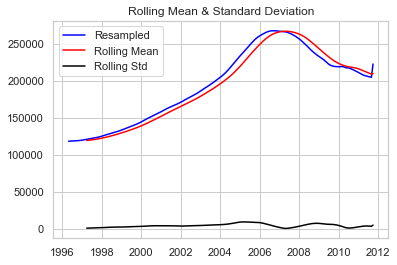

Results of Dickey-Fuller Test:
Test Statistic                  -0.361852
p-value                          0.916276
#Lags Used                       1.000000
Number of Observations Used    184.000000
Critical Value (1%)             -3.466398
Critical Value (5%)             -2.877380
Critical Value (10%)            -2.575214
dtype: float64


In [241]:
# Resampled the 'train_set' time series data to monthly frequency and fill missing values with forward fill
train_set = train_set.resample('M').mean().fillna(method='ffill')

# Defined a function to check the stationarity of a time series

def stationarity_check(TS):
    """
    Check the stationarity of a resampled time series using the Dickey-Fuller test and rolling statistics.
    
    Parameters:
    TS (pandas.Series): The time series to check for stationarity.
    
    Returns:
    None: Prints the Dickey-Fuller test results and plots the rolling mean and standard deviation.
    """
    # Calculated rolling statistics
    roll_mean = TS.rolling(window=12).mean()  # Rolling mean with a window size of 12 months
    roll_std = TS.rolling(window=12).std()    # Rolling standard deviation with a window size of 12 months
    
    # Performed the Dickey-Fuller test to check for stationarity
    dftest = adfuller(TS)
    
    # Plotted rolling statistics
    plt.plot(TS, color='blue', label='Resampled')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# Called the 'stationarity_check' function to check stationarity of the 'train_set' time series
stationarity_check(train_set)


From the above plot we can see that the data is not stationary since the rolling mean is not constant over time. We can confirm this using the adfuller test. The p-value is greater than 0.05 thus we fail to reject the null hypothesis,thisalso indicates that  data is not stationary.

### Checking for seasonality 

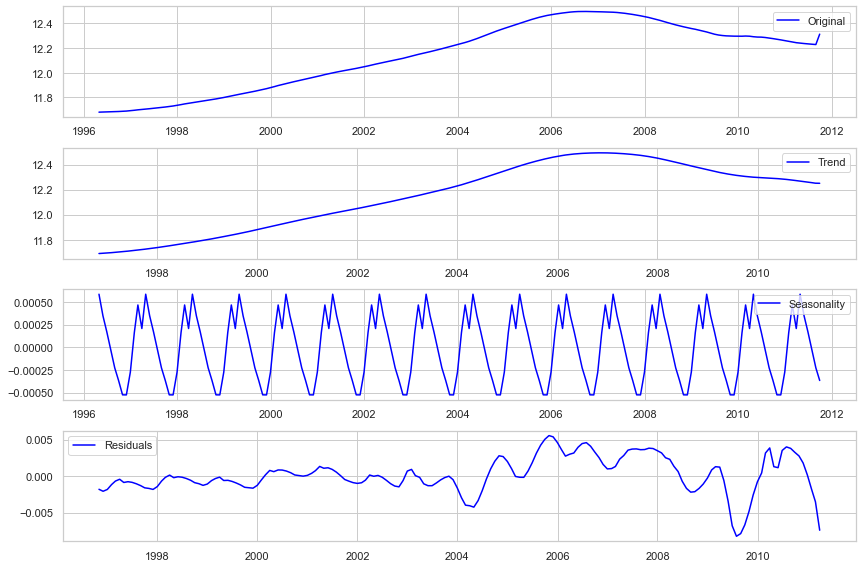

In [242]:
decomposition = seasonal_decompose(np.log(train_set),period=12)

# Gather the trend, seasonality, and residuals
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(train_set), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

- Plotting this graphs makes it easier to identify a changing mean or variation in our time series data. From the decomposition plot it clearly shows an upward trend in our time series with seasonality and minimal variation.I will need to detrend the data because if seasonality and trend are part of the time series then there will be effects in the forecast value

### Detrending the data

Since the data has both trend and seasonal component, I used defferencing to detrend the time series data because it deals with both seasonality and trend

In [243]:
# Defined a function to calculate the differenced data and check stationarity
def calculate_data_diff(train_set,period):
    # Calculated the difference of the 'train_set' time series with the specified 'period'
    data_diff = train_set.diff(periods=period).dropna()
    return stationarity_check(data_diff)

 Checking for stationarity to see if the differencing by 1 year makes the data stationary.

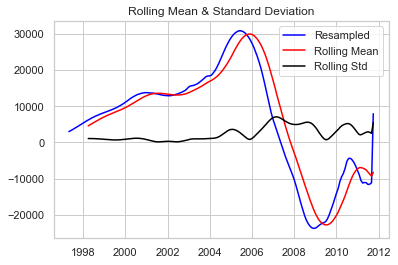

Results of Dickey-Fuller Test:
Test Statistic                  -2.514293
p-value                          0.112035
#Lags Used                      14.000000
Number of Observations Used    159.000000
Critical Value (1%)             -3.472161
Critical Value (5%)             -2.879895
Critical Value (10%)            -2.576557
dtype: float64


In [244]:
# Calling the 'calculate_data_diff' function to calculate data differences and check stationarity
# with a specified period of 12 months
calculate_data_diff(train_set,12)

The p value is still greater than 0.05 showing that the data is not stationary.

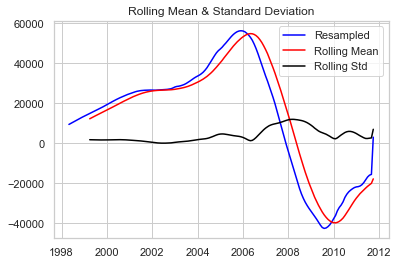

Results of Dickey-Fuller Test:
Test Statistic                  -2.786414
p-value                          0.060241
#Lags Used                       3.000000
Number of Observations Used    158.000000
Critical Value (1%)             -3.472431
Critical Value (5%)             -2.880013
Critical Value (10%)            -2.576619
dtype: float64


In [245]:
# Calling the 'calculate_data_diff' function to calculate data differences and check stationarity
# with a specified period of 24 months

calculate_data_diff(train_set,24)

The p value is still greater than 0.05 showing that the data is not stationary.

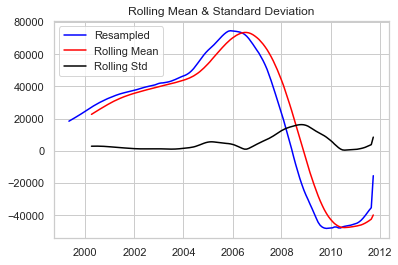

Results of Dickey-Fuller Test:
Test Statistic                  -2.473729
p-value                          0.121998
#Lags Used                       1.000000
Number of Observations Used    148.000000
Critical Value (1%)             -3.475325
Critical Value (5%)             -2.881275
Critical Value (10%)            -2.577293
dtype: float64


In [246]:
# Calling the 'calculate_data_diff' function to calculate data differences and check stationarity
# with a specified period of 36 months

calculate_data_diff(train_set,36)

The p value is still greater than 0.05 showing that the data is not stationary

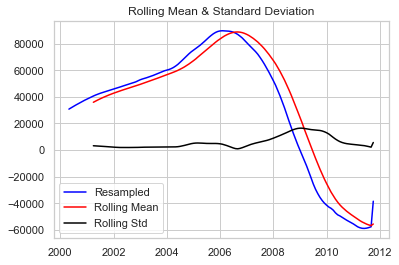

Results of Dickey-Fuller Test:
Test Statistic                  -3.123698
p-value                          0.024848
#Lags Used                       1.000000
Number of Observations Used    136.000000
Critical Value (1%)             -3.479372
Critical Value (5%)             -2.883037
Critical Value (10%)            -2.578234
dtype: float64


In [247]:
#  Calling the 'calculate_data_diff' function to calculate data differences and check stationarity
# with a specified period of 48 months 
calculate_data_diff(train_set,48)

The p value is now less than 0.05 showing that the data is finally stationary.

In [248]:
# Calculated the difference of the 'train_set' time series with a period of 48 months
data_diff = train_set.diff(periods=48).dropna()

 ## Plotting ACF and PACF

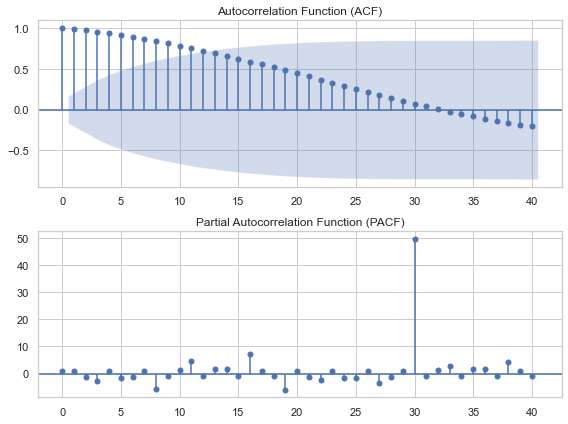

In [249]:

# Defined a function to plot the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)
def plot_acf_pacf(data):
    # Created a figure with two subplots (ACF and PACF)
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
    
    # Plot the Autocorrelation Function (ACF) with a maximum of 40 lags
    plot_acf(data, ax=axes[0], lags=40)
    
    # Plot the Partial Autocorrelation Function (PACF) with a maximum of 40 lags
    plot_pacf(data, ax=axes[1], lags=40)
    
    # Set titles for the subplots
    axes[0].set_title('Autocorrelation Function (ACF)', fontsize=12)
    axes[1].set_title('Partial Autocorrelation Function (PACF)', fontsize=12)
    
    # Adjust the layout of the subplots for better visualization
    plt.tight_layout()
    
    # Displayed the ACF and PACF plots
    plt.show()

# Calling the 'plot_acf_pacf' function to plot ACF and PACF for the 'data_diff' time series
plot_acf_pacf(data_diff)


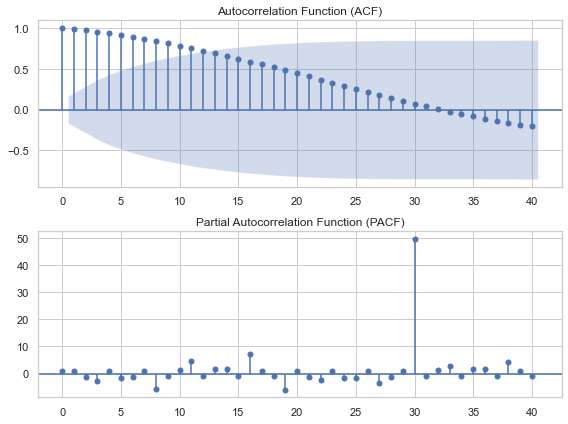

In [250]:
def plot_acf_pacf(data):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
    plot_acf(data, ax=axes[0], lags=40)
    plot_pacf(data, ax=axes[1], lags=40)
    axes[0].set_title('Autocorrelation Function (ACF)', fontsize=12)
    axes[1].set_title('Partial Autocorrelation Function (PACF)', fontsize=12)
    plt.tight_layout()
    plt.show()

plot_acf_pacf(data_diff)

-From the acf plot, lags between 1 and 14 are in the statistically significant region meaning time periods within that span can affect present values. The plot shows a significant peak at a particular lag and decays exponentially afterward suggesting the presence of a seasonal pattern and the presence of an autoregressive (AR) process.

From the pacf plot it shows significant spikes at multiple lags but decays afterward, it suggests the presence of a mixed autoregressive-moving average (ARMA) process.

From the above we conclude that some of the models we'll fit are AR model and AR(I)MA models

## Baseline Model

## Arima

In [251]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model
order = (1, 1, 0)  # Replace p, d, and q with appropriate values
model = ARIMA(data_diff, order=order)
fitted_model = model.fit()

# Get the summary of the model
model_summary = fitted_model.summary()

# Print the model summary
print(model_summary)

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  138
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1246.241
Date:                Fri, 26 Jul 2024   AIC                           2496.482
Time:                        11:54:59   BIC                           2502.322
Sample:                    04-30-2000   HQIC                          2498.855
                         - 09-30-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4741      0.014     32.702      0.000       0.446       0.502
sigma2      4.319e+06   1.04e+05     41.562      0.000    4.12e+06    4.52e+06
Ljung-Box (L1) (Q):                   7.15   Jarque-

In [252]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model
order = (1, 1, 1)  # Replace p, d, and q with appropriate values
model = ARIMA(data_diff, order=order)
fitted_model1 = model.fit()

# Get the summary of the model
model_summary = fitted_model1.summary()

# Print the model summary
print(model_summary)

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  138
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1232.466
Date:                Fri, 26 Jul 2024   AIC                           2470.932
Time:                        11:55:12   BIC                           2479.692
Sample:                    04-30-2000   HQIC                          2474.492
                         - 09-30-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9193      0.059     15.673      0.000       0.804       1.034
ma.L1         -0.7701      0.097     -7.956      0.000      -0.960      -0.580
sigma2      3.625e+06   1.02e+05     35.395      0.0

In [253]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model
order = (1, 1, 2)  # Replace p, d, and q with appropriate values
model = ARIMA(data_diff, order=order)
fitted_model2 = model.fit()

# Get the summary of the model
model_summary = fitted_model2.summary()

# Print the model summary
print(model_summary)

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  138
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1232.447
Date:                Fri, 26 Jul 2024   AIC                           2472.894
Time:                        11:55:17   BIC                           2484.574
Sample:                    04-30-2000   HQIC                          2477.641
                         - 09-30-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9177      0.074     12.453      0.000       0.773       1.062
ma.L1         -0.7832      0.102     -7.653      0.000      -0.984      -0.583
ma.L2          0.0171      0.055      0.310      0.7

Based on the AIC and BIC values, the ARIMA(1,1,1) model is the best fit among the three models. 

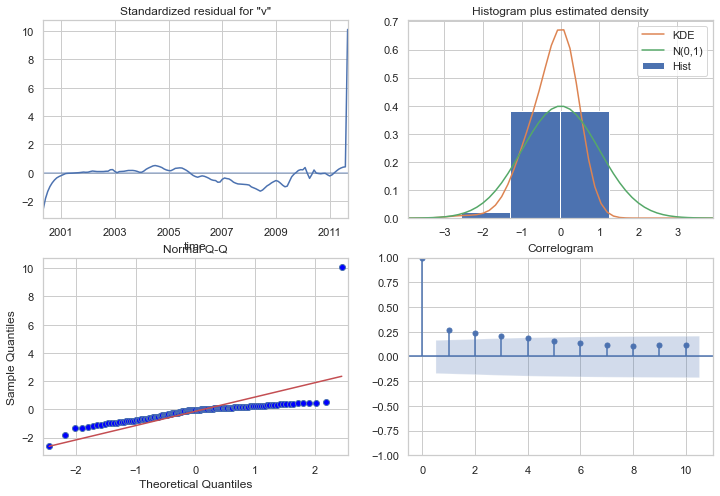

In [254]:
fitted_model1.plot_diagnostics(figsize=(12, 8))
plt.show()

Standardized Residual for ‘V’
it helps assess whether data follows a normal distribution. Points scattered around the line suggest deviations from normality.
Histogram plus Estimated Density
Shows data distribution, density estimation, and how closely it follows a standard normal distribution.
Sample Quantiles vs Theoretical Quantiles
he red line indicates where points would lie if they perfectly followed expected theoretical quantile values.
Residuals vs Leverage
Plots standardized residuals against leverage values, detecting outliers or influential observations.

In [276]:

# Forecast future values
forecast_steps = len(test_set)
forecast = fitted_model1.forecast(steps=forecast_steps)
# Plot the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(test_set.index, test_set, label='Actual')
plt.plot(test_set.index, forecast, label='Forecast')
plt.xlabel('Time')
plt.ylabel('detrended ')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()
# Calculate and print the model's performance metrics (optional)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_set, forecast)
print(f'Mean Squared Error: {mse}')

ValueError: year 92668 is out of range

## Tuning the baselline to improve performance


In [270]:

!pip install pmdarima


In [272]:
!pip install numpy==1.21.0 pandas==1.3.0 pmdarima==1.8.2


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\Adan\\anaconda3\\envs\\learn-env\\Lib\\site-packages\\~mdarima\\utils\\_array.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.3
    Uninstalling pandas-1.1.3:
      Successfully uninstalled pandas-1.1.3
  Attempting uninstall: pmdarima
    Found existing installation: pmdarima 2.0.4
    Uninstalling pmdarima-2.0.4:
      Successfully uninstalled pmdarima-2.0.4


In [280]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error

# Fit an automatic ARIMA model
stepwise_model = auto_arima(train_set, seasonal=False, trace=True)

# Summary of the best model
print(stepwise_model.summary())


ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 80 from PyObject

### SARIMA MODEL

In [281]:
train = ts[:'2013-04']

print("Optimizing SARIMA Model\n" + "-" * 40)
# Use auto_arima to find the best SARIMA model
sarima_model = pm.auto_arima(train,
                             start_p=0, start_q=0, start_P=0, start_Q=0,
                             max_p=5, max_q=5, max_P=5, max_Q=5,
                             seasonal=True, m=12,  # Using 12 assuming the data is monthly. Adjust if needed.
                             d=1, D=1,  # These can be adjusted based on the dataset's properties
                             trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=True, with_intercept=False)
# Print the summary of the best model
print(sarima_model.summary())
print("-" * 50)

Optimizing SARIMA Model
----------------------------------------


NameError: name 'pm' is not defined